## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('student dataset.csv')

## Data Cleaning and Preprocessing

In [3]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']] = imputer.fit_transform(df[['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']])


In [4]:
# Encode categorical variables using a dictionary of LabelEncoders
label_encoders = {}
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [5]:
# Handle remaining categorical columns (if there are any not listed above)
remaining_categorical_cols = df.select_dtypes(include=['object']).columns
for col in remaining_categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [6]:
# Handle outliers (using IQR method)
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('G3')

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1


In [7]:
# Filter out outliers and keep consistent rows for X and y
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [8]:
X = df.drop(['G3'], axis=1)  # Features
y = df['G3']  # Target variable


## # Standardize the features

In [9]:
scaler = StandardScaler()
X_numeric = X[numerical_cols]
X_numeric = scaler.fit_transform(X_numeric)


## Linear Regression


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training R-squared: {train_score:.2f}')
print(f'Testing R-squared: {test_score:.2f}')


Training R-squared: 0.90
Testing R-squared: 0.77


In [13]:
y_pred = model.predict(X_test)


## Plotting predictions vs. actual values


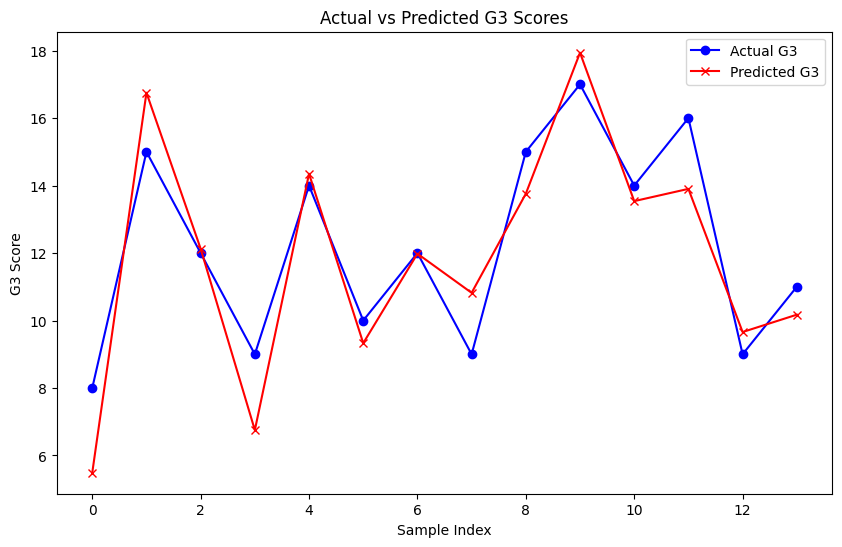

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual G3', color='blue', marker='o')
plt.plot(y_pred, label='Predicted G3', color='red', marker='x')
plt.title('Actual vs Predicted G3 Scores')
plt.xlabel('Sample Index')
plt.ylabel('G3 Score')
plt.legend()
plt.show()

Function for making predictions on new data

In [15]:
# Function for making predictions on new data
def predict_new_data(new_data):
    new_data_encoded = new_data.copy()
    
    for col in categorical_cols:
        if col in new_data.columns:
            le = label_encoders[col]
            # Transform using the fitted encoder, handling unknown categories
            new_data_encoded[col] = new_data_encoded[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    
    # Standardize numerical data
    new_numeric = new_data_encoded[numerical_cols]
    new_numeric_scaled = scaler.transform(new_numeric)
    
    # Combine the encoded categorical and standardized numeric data
    new_data_encoded = new_data_encoded.drop(numerical_cols, axis=1).reset_index(drop=True)
    new_data_final = pd.concat([new_data_encoded.reset_index(drop=True), pd.DataFrame(new_numeric_scaled, columns=numerical_cols)], axis=1)
    
    # Predict using the trained model
    prediction = model.predict(new_data_final)
    return prediction

Function to get individual input from the user

In [16]:
# Function to get individual input from the user
def get_user_input():
    input_data = {}
    input_data['school'] = input("Enter school (GP/MS): ")
    input_data['sex'] = input("Enter sex (F/M): ")
    input_data['age'] = int(input("Enter age: "))
    input_data['address'] = input("Enter address (U/R): ")
    input_data['famsize'] = input("Enter family size (LE3/GT3): ")
    input_data['Pstatus'] = input("Enter parent status (T/A): ")
    input_data['Medu'] = int(input("Enter mother's education (0-4): "))
    input_data['Fedu'] = int(input("Enter father's education (0-4): "))
    input_data['Mjob'] = input("Enter mother's job (teacher/health/services/at_home/other): ")
    input_data['Fjob'] = input("Enter father's job (teacher/health/services/at_home/other): ")
    input_data['reason'] = input("Enter reason for school choice (home/reputation/course/other): ")
    input_data['guardian'] = input("Enter guardian (mother/father/other): ")
    input_data['traveltime'] = int(input("Enter travel time (1-4): "))
    input_data['studytime'] = int(input("Enter study time (1-4): "))
    input_data['failures'] = int(input("Enter number of past class failures (0-4): "))
    input_data['schoolsup'] = input("Extra educational support (yes/no): ")
    input_data['famsup'] = input("Family educational support (yes/no): ")
    input_data['paid'] = input("Extra paid classes (yes/no): ")
    input_data['activities'] = input("Extra-curricular activities (yes/no): ")
    input_data['nursery'] = input("Attended nursery school (yes/no): ")
    input_data['higher'] = input("Wants to take higher education (yes/no): ")
    input_data['internet'] = input("Has internet access at home (yes/no): ")
    input_data['romantic'] = input("In a romantic relationship (yes/no): ")
    input_data['famrel'] = int(input("Family relationship quality (1-5): "))
    input_data['freetime'] = int(input("Free time after school (1-5): "))
    input_data['goout'] = int(input("Going out with friends (1-5): "))
    input_data['Dalc'] = int(input("Workday alcohol consumption (1-5): "))
    input_data['Walc'] = int(input("Weekend alcohol consumption (1-5): "))
    input_data['health'] = int(input("Current health status (1-5): "))
    input_data['absences'] = int(input("Number of school absences: "))
    input_data['G1'] = int(input("First period grade (0-20): "))
    input_data['G2'] = int(input("Second period grade (0-20): "))

        # Convert 'yes/no' inputs to binary (1/0)
    for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
        input_data[col] = 1 if input_data[col].lower() == 'yes' else 0

    return pd.DataFrame([input_data])


In [17]:
# Get user input and make a prediction
user_data = get_user_input()
prediction = predict_new_data(user_data)
print(f'Predicted G3 Score: {prediction[0]:.2f}')